# Set Up Environnment AND Load in Data

In [234]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np 
import seaborn as sns
import statistics 
import re
import random 
import itertools
import math 
import os


In [235]:
path = os.path.join(os.path.normpath(os.getcwd() + os.sep + os.pardir) + '/Programming Prep/')
names = os.listdir(path)
print(names)
name = 'bike.xlsx'
file = path + name

if re.search(r'\.csv$', name):
    data = pd.read_csv(file)
elif re.search(r'\.xlsx$', name):
    data = pd.read_excel(file)
else:
    print("FILE OF INVALID FORMAT")

display(data.head())


['bike.xlsx', 'Coding Plan for Jane Street.docx', 'DataCleaning.ipynb', 'data_description.txt', 'EDA.ipynb', 'ISLP_website.pdf', 'JS Notes.pptx', 'practicedata.csv', 'train.csv']


,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,1.0,December,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180
1,261695,2021-12-01,1.0,December,2021,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
2,261697,2021-12-02,2.0,December,2021,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,420,769,698,840,1538
3,261698,2021-12-02,2.0,December,2021,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,420,769,349,420,769
4,261699,2021-12-03,3.0,December,2021,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,0,2295,2086,0,4590


,Sales_Order #,Date,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,89.000000,89,88.000000,89.0,89.000000,88.000000,89.000000,89.000000,89.000000,89.000000,89.00000
mean,261738.067416,2021-12-13 10:31:00.674157312,13.534091,2021.0,34.202247,2.125000,1052.247191,1940.943820,1848.887640,2204.235955,4043.94382
min,261695.000000,2021-12-01 00:00:00,1.000000,2021.0,17.000000,1.000000,0.000000,0.000000,245.000000,0.000000,0.00000
25%,261716.000000,2021-12-08 00:00:00,8.750000,2021.0,30.000000,1.000000,420.000000,2295.000000,1043.000000,1252.000000,2295.00000
50%,261738.000000,2021-12-13 00:00:00,13.500000,2021.0,35.000000,2.000000,1252.000000,2295.000000,1054.000000,1266.000000,2320.00000
75%,261760.000000,2021-12-19 00:00:00,19.000000,2021.0,38.000000,3.000000,1266.000000,2320.000000,2954.000000,3756.000000,6750.00000
max,261782.000000,2021-12-24 00:00:00,24.000000,2021.0,63.000000,4.000000,1912.000000,3400.000000,5908.000000,7592.000000,13500.00000
std,25.729713,NaN,6.391353,0.0,8.090651,1.239322,440.499001,789.955743,1394.401162,1730.330926,3139.75858


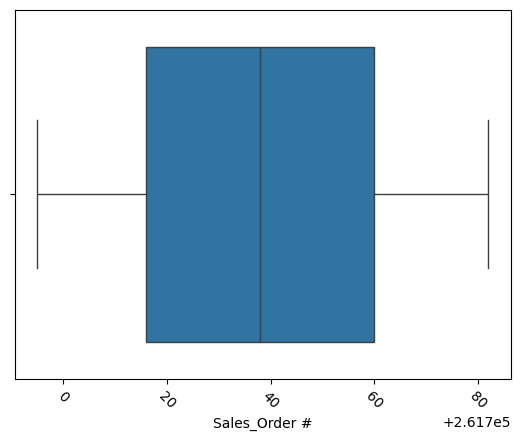

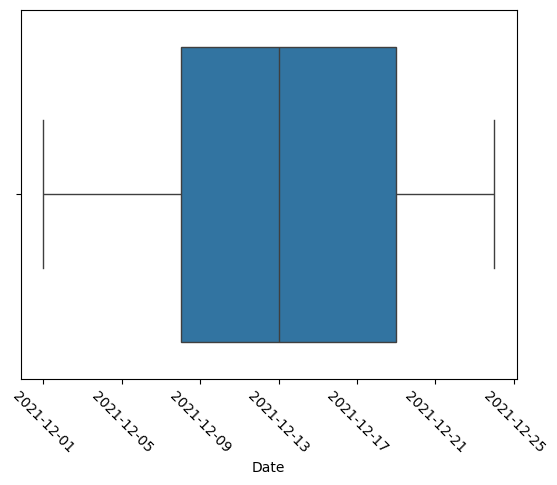

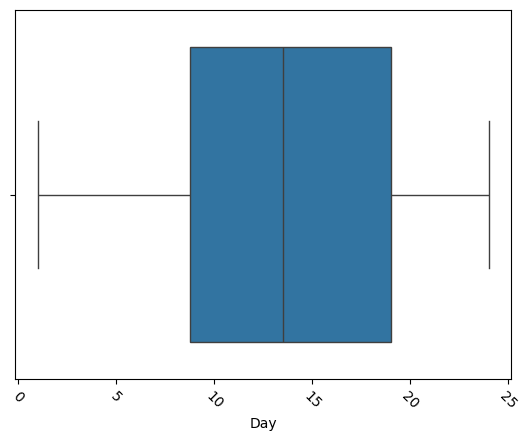

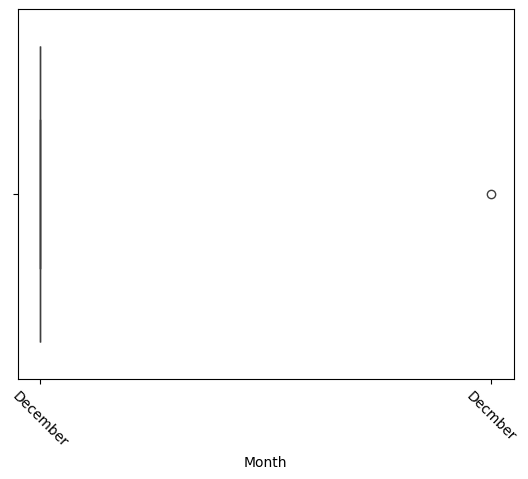

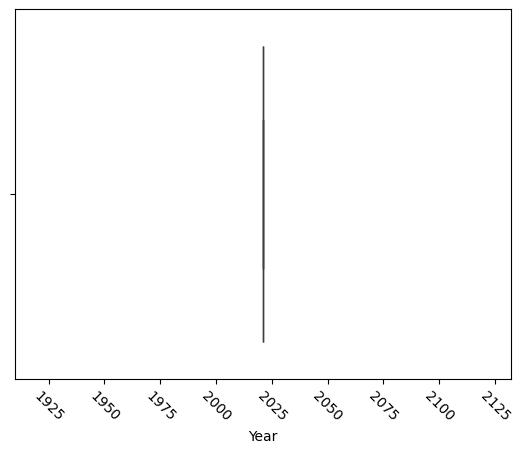

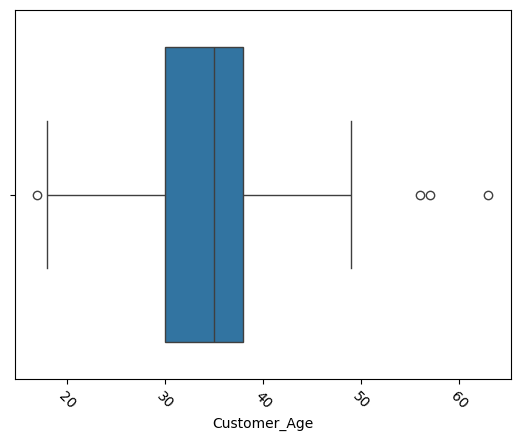

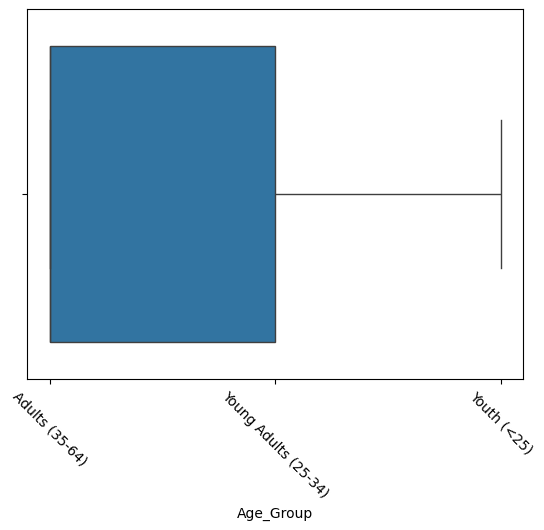

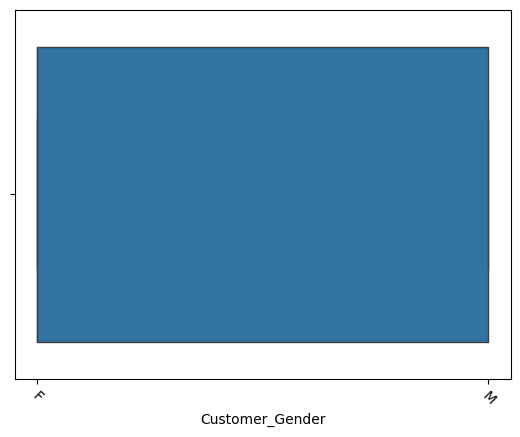

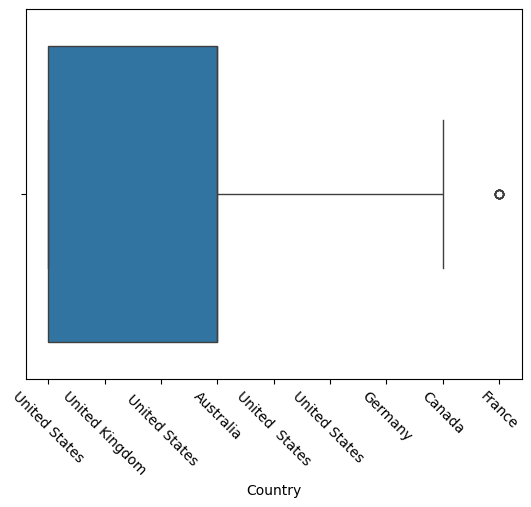

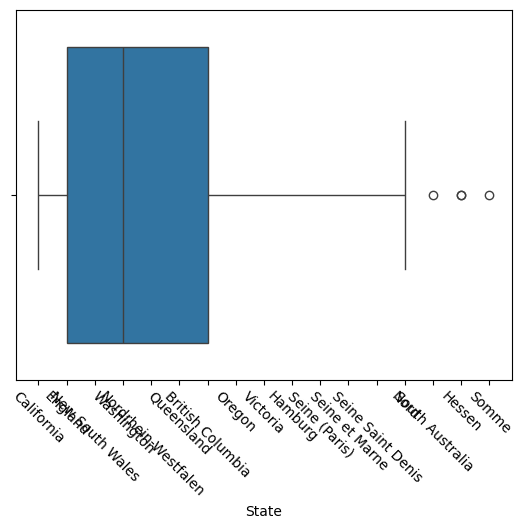

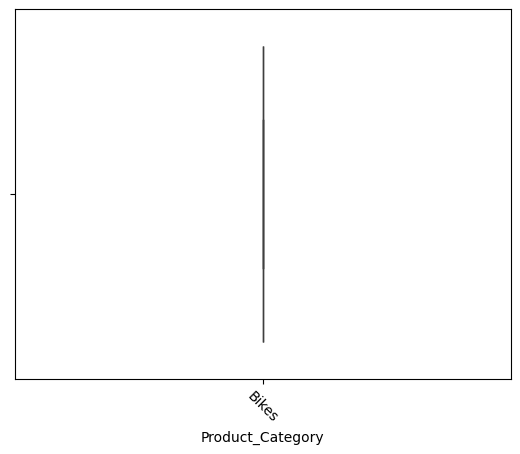

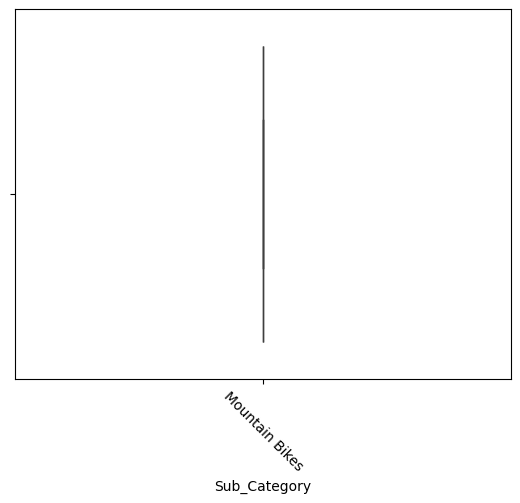

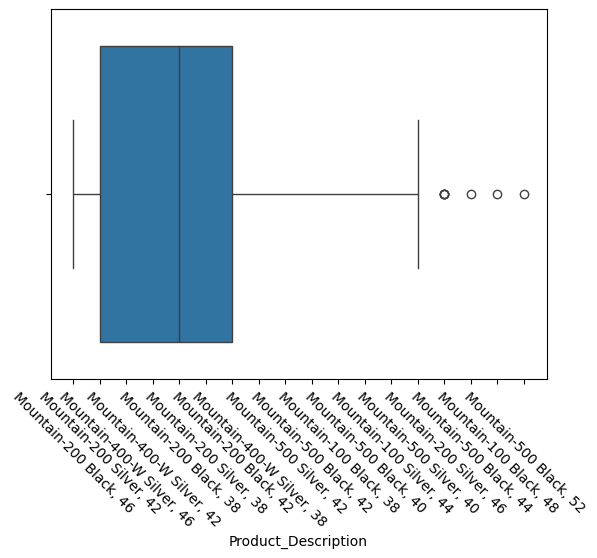

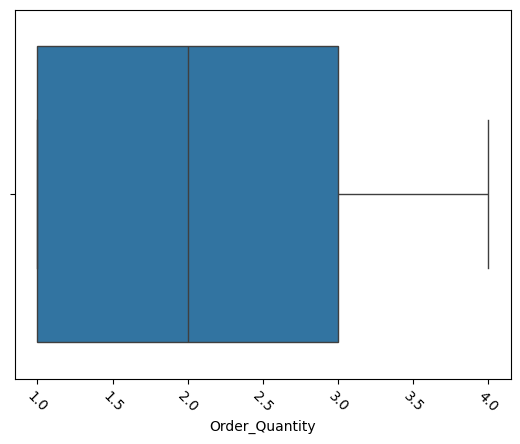

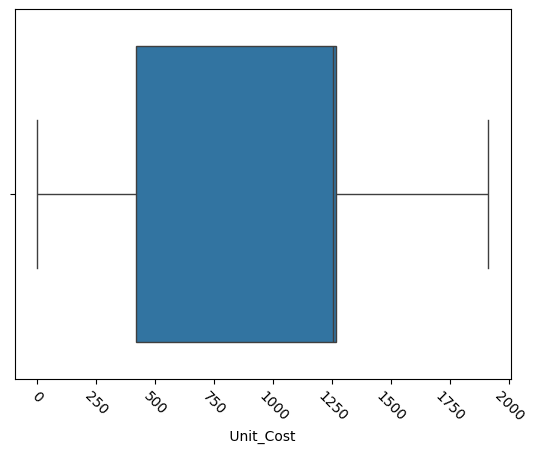

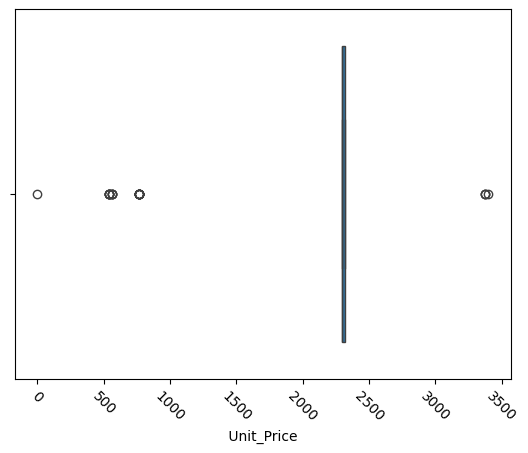

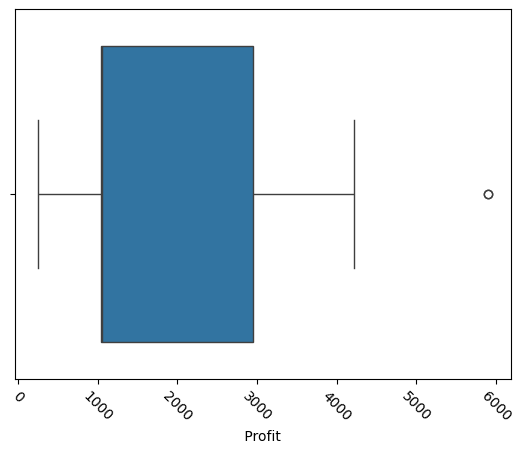

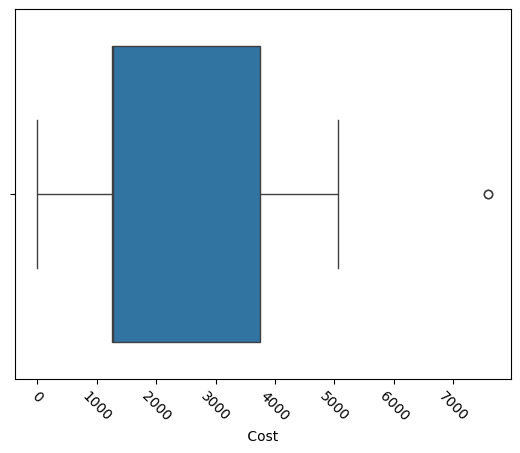

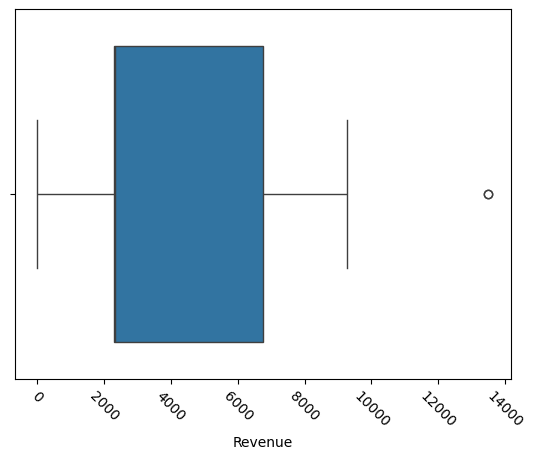

In [236]:
display(data.describe())

for col in list(data.columns):
    sns.boxplot(x=col, data=data)
    plt.xticks(rotation=-45)
    plt.show()

                Sales_Order #       Day  Year  Customer_Age  Order_Quantity  \
Sales_Order #        1.000000  0.991462   NaN     -0.079874        0.080085   
Day                  0.991462  1.000000   NaN     -0.091624        0.142735   
Year                      NaN       NaN   NaN           NaN             NaN   
Customer_Age        -0.079874 -0.091624   NaN      1.000000       -0.013821   
Order_Quantity       0.080085  0.142735   NaN     -0.013821        1.000000   
 Unit_Cost           0.084581  0.096176   NaN      0.247874       -0.046910   
 Unit_Price          0.051096  0.059232   NaN      0.269569       -0.071612   
 Profit              0.141169  0.195221   NaN      0.182788        0.758328   
 Cost                0.167593  0.222671   NaN      0.170329        0.745916   
Revenue              0.157661  0.211891   NaN      0.182500        0.730576   

                 Unit_Cost    Unit_Price    Profit      Cost    Revenue  
Sales_Order #      0.084581      0.051096  0.141169  0.1

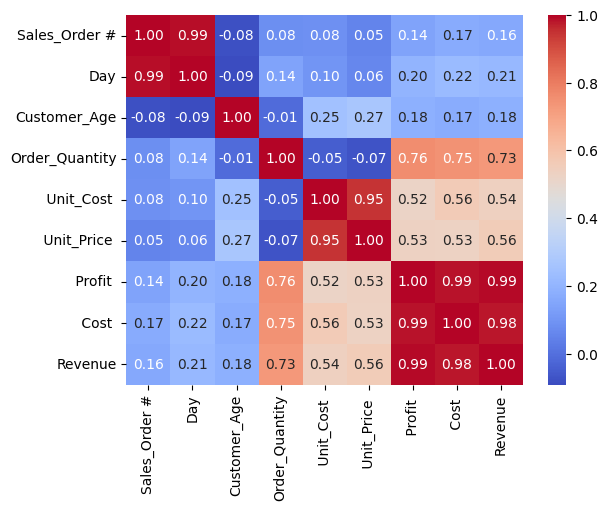

In [237]:
num_cols = data.select_dtypes(include=[np.number])
corr_matrix = num_cols.corr()
print(corr_matrix)
corr_matrix = corr_matrix.dropna(how='all', axis=0).dropna(how='all', axis=1)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Exploration AND Cleaning

### Missing Values - Exploration

In [238]:
# Explore Null Values
all_values_count = data.isnull().sum()
null_values_count = all_values_count.loc[all_values_count != 0].sort_values(ascending=False)
null_cols = null_values_count.index.tolist()
full_cols = all_values_count.loc[all_values_count == 0].index.tolist()
null_data = data.loc[data.isnull().any(axis=1)]

#display(all_values_count)
display(null_values_count) 
#print(null_cols) 
#print(full_cols)
display(null_data)
#print(f'The number of columns with missing values are {len(null_cols)} out of {len(data.columns)}')
#print(f'The number of rows with missing values are {len(null_data)} out of {len(data)}')

Day                    1
Age_Group              1
Product_Description    1
Order_Quantity         1
dtype: int64

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
10,261704,2021-12-05,NaN,December,2021,42,Adults (35-64),M,Germany,Nordrhein-Westfalen,Bikes,Mountain Bikes,"Mountain-200 Black, 38",4.0,1252,2295,4172,5008,9180
15,261709,2021-12-06,6.0,December,2021,36,NaN,M,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-200 Black, 42",1.0,1252,2295,1043,1252,2295
21,261715,2021-12-08,8.0,December,2021,39,Adults (35-64),F,United States,Oregon,Bikes,Mountain Bikes,NaN,2.0,1252,2295,2086,2504,4590
22,261716,2021-12-08,8.0,December,2021,35,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-500 Black, 42",NaN,295,540,245,0,0


In [239]:
# Explore Zero Values (Make sure to reason whether it makes sense for zeros to exist)
zero_data = data.loc[(data == 0).any(axis=1)]
zero_values_count = (data == 0).sum()
zero_values_count = zero_values_count.loc[zero_values_count != 0]

display(zero_values_count)
display(zero_data)

 Unit_Cost      1
 Unit_Price     1
 Cost           2
Revenue         2
dtype: int64

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
4,261699,2021-12-03,3.0,December,2021,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,0,2295,2086,0,4590
8,261702,2021-12-04,4.0,December,2021,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",4.0,420,0,1396,1680,0
22,261716,2021-12-08,8.0,December,2021,35,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-500 Black, 42",NaN,295,540,245,0,0


In [240]:
# Compare correlations between all numerical variables, sort and then display their scatterplots
# Create a correlation matrix as well perhaps

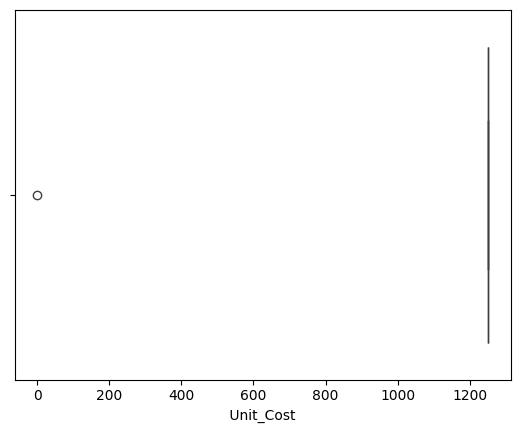

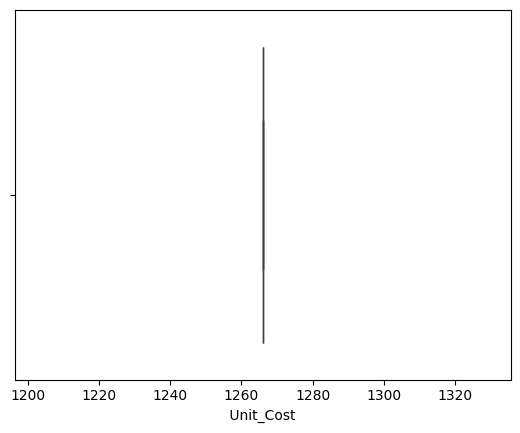

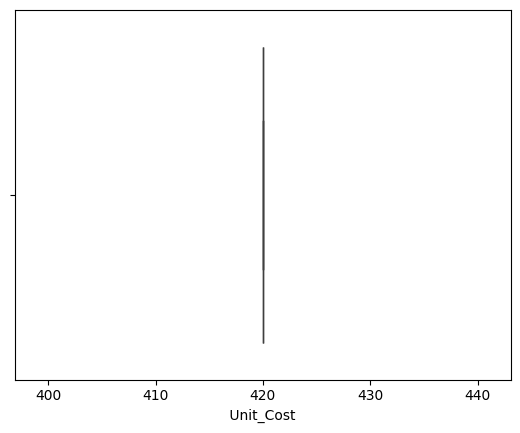

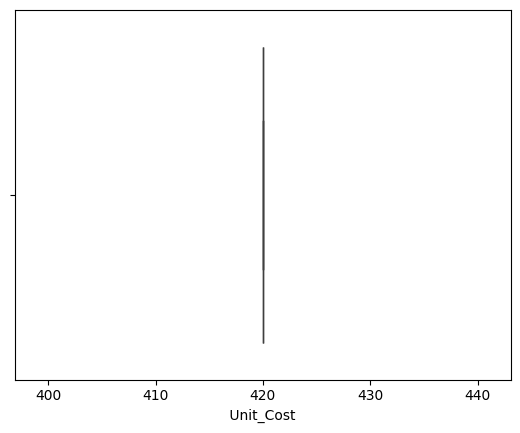

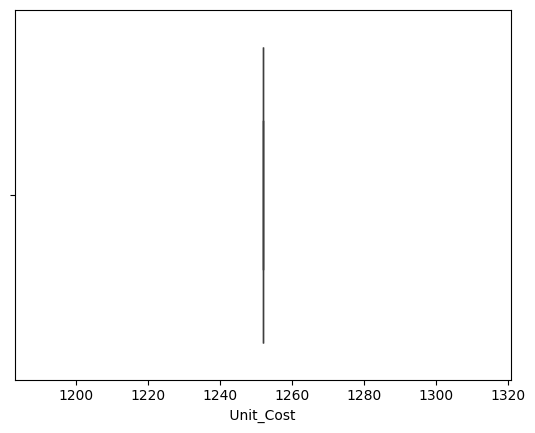

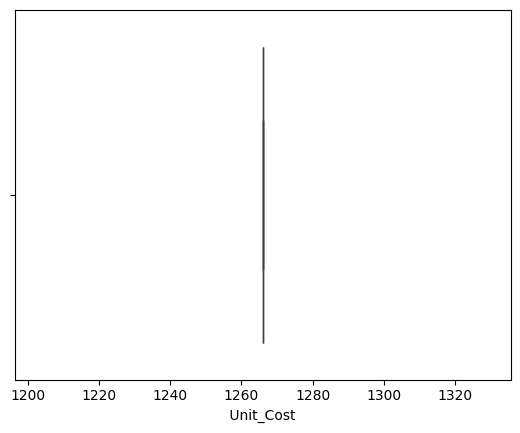

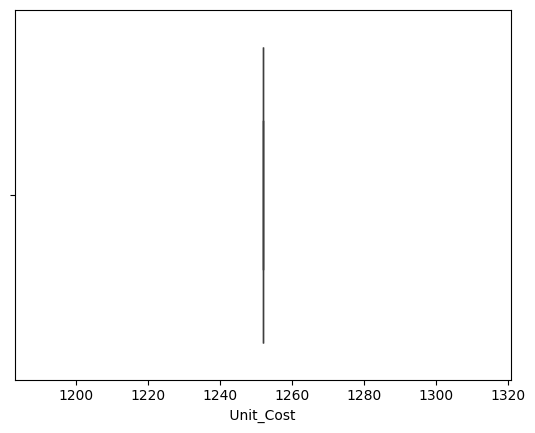

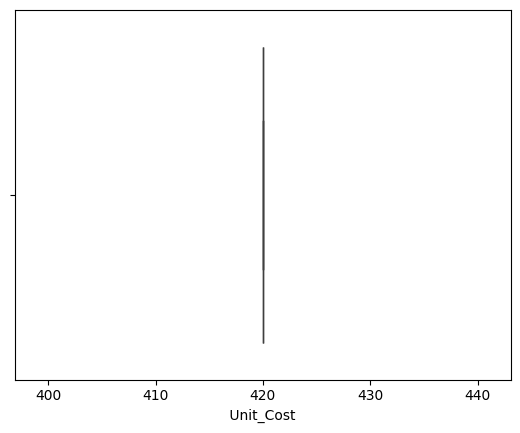

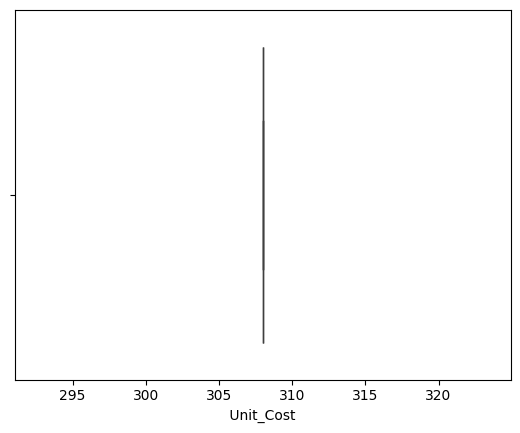

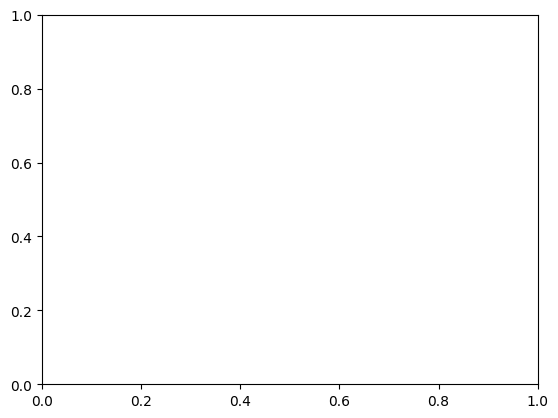

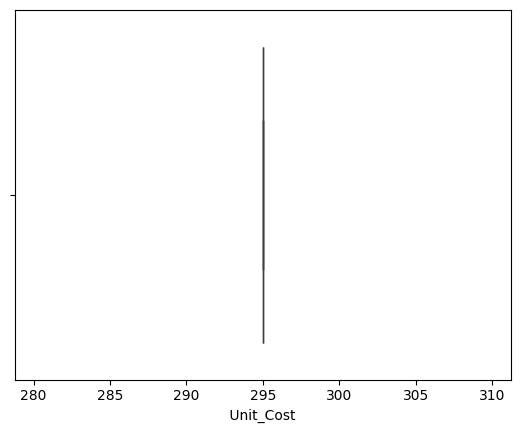

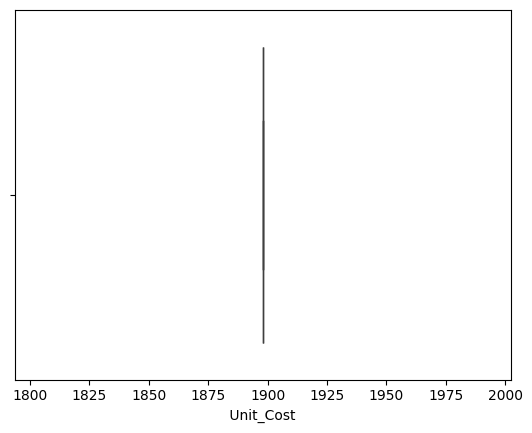

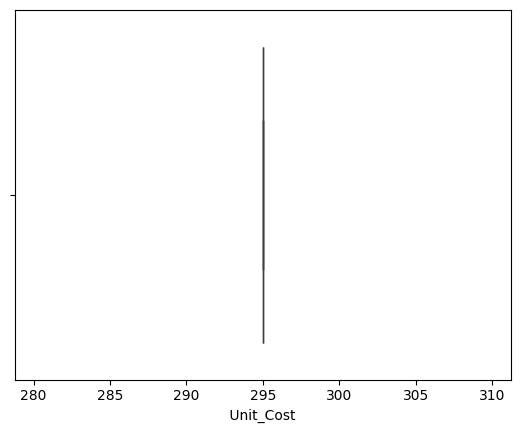

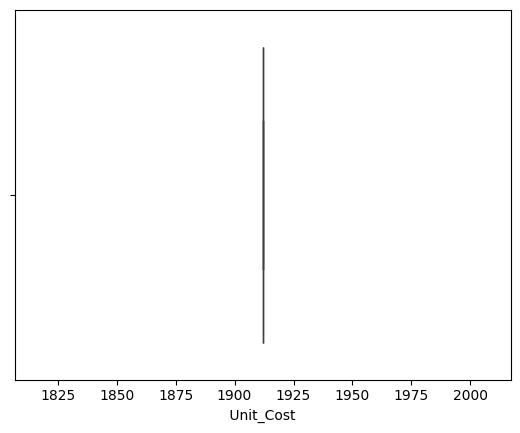

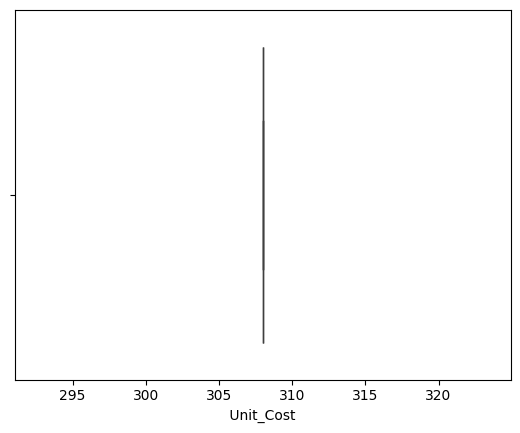

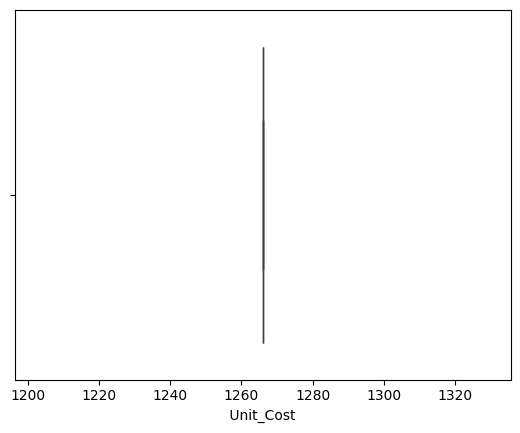

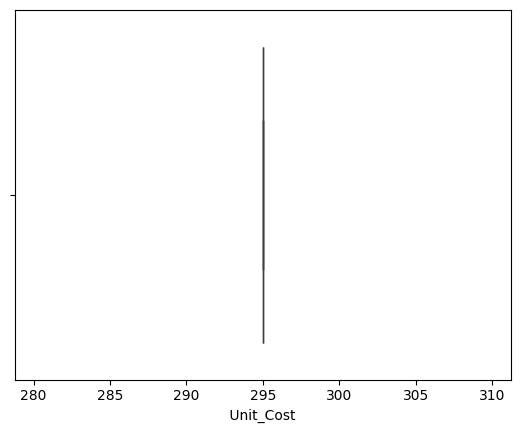

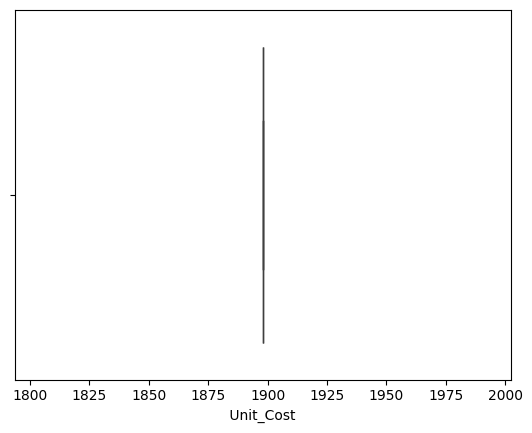

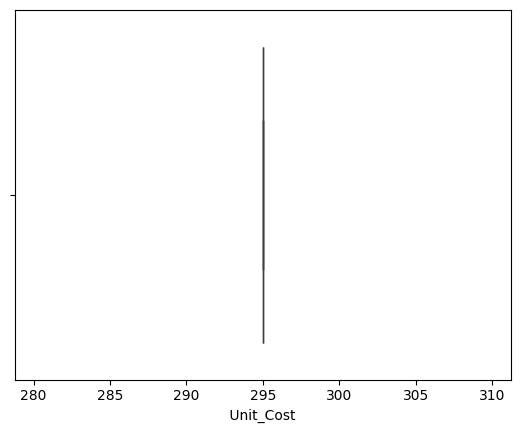

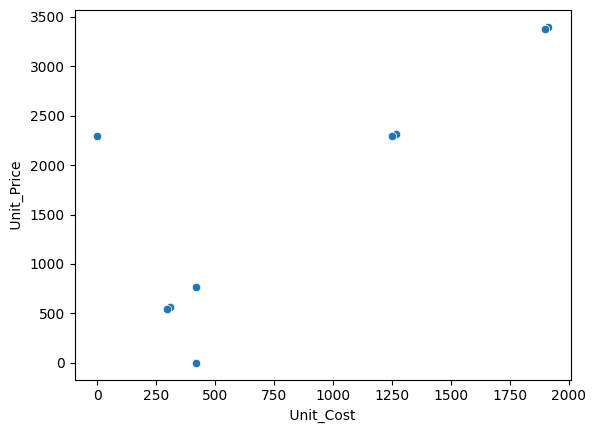

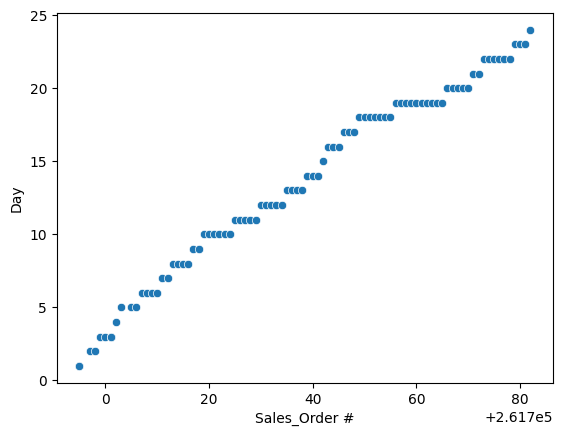

'\nfor col in list(null_data.columns):\n    sns.boxplot(x=col, data=data)\n    plt.xticks(rotation=45)\n    plt.show()\n'

In [241]:
# MCAR vs MAR vs MNAR
# Check if there is a correlation between missing column and some non_null variable (MAR check)
null_col = 'col_name'
full_col = 'col_name'


for bike in data["Product_Description"].unique():
    sns.boxplot(x=" Unit_Cost ", data=data.loc[data["Product_Description"] == bike])
    plt.show()

sns.scatterplot(x=" Unit_Cost ", y=" Unit_Price ", data=data)
plt.show()
sns.scatterplot(x="Sales_Order #", y="Day", data=data)
plt.show()

# Check if there is a bias in the missing data (MNAR check), basically do a range of values check
#null_data.describe()
# Check if there are nan columns in the same row or not, for dependencies when imputation
'''
for col in list(null_data.columns):
    sns.boxplot(x=col, data=data)
    plt.xticks(rotation=45)
    plt.show()
'''


### Missing Values - Solutions

In [242]:
copy = data.copy()
print(copy.columns)

# Fill NaN

# Solution 1: Acceptance, don't do anything

# Solution 2: Deletion, drop Null rows
#copy = copy.dropna()

# Solution 3: Imputation by mean/median/mode
#num_cols = copy.select_dtypes(include=[np.number])
#copy[num_cols.columns] = num_cols.fillna(num_cols.mean())


# Solution 4: Imputation by formula
copy["Order_Quantity"] = copy["Order_Quantity"].fillna(copy[" Profit "]/(copy[" Unit_Price "] - copy[" Unit_Cost "]))

# Solution 5: Imputation by regression/prediction

print(copy.isna().sum())

Index(['Sales_Order #', 'Date', 'Day', 'Month', 'Year', 'Customer_Age',
       'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product_Description', 'Order_Quantity', ' Unit_Cost ',
       ' Unit_Price ', ' Profit ', ' Cost ', 'Revenue'],
      dtype='object')
Sales_Order #          0
Date                   0
Day                    1
Month                  0
Year                   0
Customer_Age           0
Age_Group              1
Customer_Gender        0
Country                0
State                  0
Product_Category       0
Sub_Category           0
Product_Description    1
Order_Quantity         0
 Unit_Cost             0
 Unit_Price            0
 Profit                0
 Cost                  0
Revenue                0
dtype: int64


In [243]:
# Fill/Correct Zeros or Nans

# Solution 1: Replacement
#copy = copy.replace(to_replace=0, value=0)

# is there a way to automate this, so that all formula are checked? 
# change the == 0 to an, is outlier function
#'''
copy[" Cost "] = np.where(copy[" Cost "] == 0,
                          np.where(copy["Revenue"] != 0, 
                                   copy["Revenue"] - copy[" Profit "], 
                                   copy["Order_Quantity"] * copy[" Unit_Cost "]), 
                          copy[" Cost "])

copy["Revenue"] = np.where(copy["Revenue"] == 0,
                          np.where(copy[" Cost "] != 0, 
                                   copy[" Cost "] + copy[" Profit "], 
                                   copy["Order_Quantity"] * copy[" Unit_Price "]), 
                          copy["Revenue"])

copy[" Unit_Cost "] = np.where(copy[" Unit_Cost "] == 0, 
                               copy[" Cost "]/copy["Order_Quantity"], 
                               copy[" Unit_Cost "])
copy[" Unit_Price "] = np.where(copy[" Unit_Price "] == 0, 
                               copy["Revenue"]/copy["Order_Quantity"], 
                               copy[" Unit_Price "])
#'''

# Solution 2: np.where replacement
#copy["Order_Quantity"] = np.where(copy["Order_Quantity"].isna(), copy[" Profit "]/(copy[" Unit_Price "] - copy[" Unit_Cost "]), copy["Order_Quantity"])

# Solution 3: .apply

#This solution is not necessarily right, perhaps better product description is required
for index, row in copy.iterrows():
    if pd.isna(row["Product_Description"]):
        filter = copy.loc[copy[" Unit_Price "] == row[" Unit_Price "]]
        mode_desc = filter["Product_Description"].mode()
        #print(mode_desc)
        #display(filter)
        copy.loc[index, "Product_Description"] = mode_desc.iloc[0]
        #print(copy.iloc[index]["Product_Description"])
        #display(copy.iloc[index]["Product_Description"])

print(copy.isna().sum())

Sales_Order #          0
Date                   0
Day                    1
Month                  0
Year                   0
Customer_Age           0
Age_Group              1
Customer_Gender        0
Country                0
State                  0
Product_Category       0
Sub_Category           0
Product_Description    0
Order_Quantity         0
 Unit_Cost             0
 Unit_Price            0
 Profit                0
 Cost                  0
Revenue                0
dtype: int64


In [244]:
# Duplicate Values

In [ ]:
# Format Errors

# dates to days
copy["Day"] = copy["Day"].fillna(copy["Date"].dt.day)

# wrong format dates to datetime
#copy["Datetime"] = pd.to_datetime(copy["Date"], format="%m/%d/%y")
'''
1/17/07 has the format "%m/%d/%y"
17-1-2007 has the format "%d-%m-%Y"
'''

# financial data

# unicode

print(copy.isna().sum())

Sales_Order #          0
Date                   0
Day                    0
Month                  0
Year                   0
Customer_Age           0
Age_Group              1
Customer_Gender        0
Country                0
State                  0
Product_Category       0
Sub_Category           0
Product_Description    0
Order_Quantity         0
 Unit_Cost             0
 Unit_Price            0
 Profit                0
 Cost                  0
Revenue                0
dtype: int64


In [246]:
# Semantic Errors

In [247]:
# Range Errors

#check formula, i.e., profit = revenue - cost
#check minimums and maximums
#check outliers
